<a href="https://colab.research.google.com/github/yusibovmuraz/DataScience-1/blob/main/Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Q1-Read the data https://raw.githubusercontent.com/ogut77/DataScience/main/data/diamond.csv
data=pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/diamond.csv')

The description of dataset is given below.

•	ID: Uniquely identifies each observation (diamond)

•	Carat Weight: The weight of the diamond in metric carats. One carat is equal to 0.2 grams, roughly the same weight as a paperclip

•	Cut: One of five values indicating the cut of the diamond in the following order of desirability (Signature-Ideal, Ideal, Very Good, Good, Fair)

•	Color: One of six values indicating the diamond's color in the following order of desirability (D, E, F - Colorless, G, H, I - Near colorless)

•	Clarity: One of seven values indicating the diamond's clarity in the following order of desirability (F - Flawless, IF - Internally Flawless, VVS1 or VVS2 - Very, Very Slightly Included, or VS1 or VS2 - Very Slightly Included, SI1 - Slightly Included)

•	Polish: One of four values indicating the diamond's polish (ID - Ideal, EX - Excellent, VG - Very Good, G - Good)

•	Symmetry: One of four values indicating the diamond's symmetry (ID - Ideal, EX - Excellent, VG - Very Good, G - Good)

•	Report: One of of two values "AGSL" or "GIA" indicating which grading agency reported the qualities of the diamond qualities

•	Price: The The amount in USD that the diamond is valued


In [ ]:
#Q2-Get first 2 rows of data
data.head(2)

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470


In [ ]:
#Q3-Check if there is missing value
data.isnull().sum()

Carat Weight    0
Cut             0
Color           0
Clarity         0
Polish          0
Symmetry        0
Report          0
Price           0
dtype: int64

In [ ]:
#Q4- Get data information and number of rows and columns
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Carat Weight  6000 non-null   float64
 1   Cut           6000 non-null   object 
 2   Color         6000 non-null   object 
 3   Clarity       6000 non-null   object 
 4   Polish        6000 non-null   object 
 5   Symmetry      6000 non-null   object 
 6   Report        6000 non-null   object 
 7   Price         6000 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 375.1+ KB


(6000, 8)

In [ ]:
#Q5-Get descriptive statistics of data
data.describe()

,Carat Weight,Price
count,6000.000000,6000.000000
mean,1.334520,11791.579333
std,0.475696,10184.350051
min,0.750000,2184.000000
25%,1.000000,5150.500000
50%,1.130000,7857.000000
75%,1.590000,15036.500000
max,2.910000,101561.000000


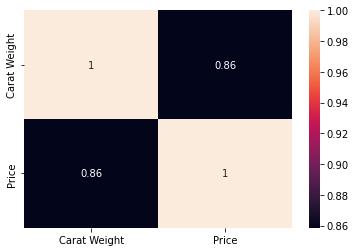

In [ ]:
#Q6-Use seasoborns heat map to generate following heatmap
# annot = True to print the correlation inside the square
sns.heatmap(data.corr(),annot=True)

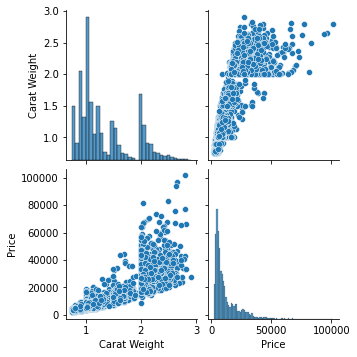

In [ ]:
#Q7-Use seasoborns paiplot to generate following  diagram
sns.pairplot(data)

In [ ]:
#Q8-Divide the data so that get Price as ouput variable (Y) and other variables as input varable (X)
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


Y=data['Price']
X=data.drop(['Price'],axis=1)

In [ ]:
#Q9-Create dummy for the input variables (X)
X = pd.get_dummies(X, drop_first=True)

In [ ]:
#Q10 -Split the input and output data into two parts: test data (20%) and train data(%80)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=5)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(4800, 23)
(4800,)
(1200, 23)
(1200,)


In [ ]:
def evalmetric(y,ypred):
 import numpy as np
 e = y - ypred 
 mse_f = np.mean(e**2)
 rmse_f = np.sqrt(mse_f)
 mae_f = np.mean(abs(e))
 mape_f = 100*np.mean(abs(e/y))
 r2_f = 1-(sum(e**2)/sum((y-np.mean(y))**2))
 print("MSE:", mse_f)
 print("RMSE:", rmse_f)
 print("MAE:",mae_f)
 print("MAPE:",mape_f)
 print("R-Squared:", r2_f)

MSE: 13839948.248906838
RMSE: 3720.2080921511415
MAE: 2416.6382939623636
MAPE: 28.379398782212856
R-Squared: 0.8664692805874095
MSE: 15440271.780094706
RMSE: 3929.4111238320056
MAE: 2461.665918388696
MAPE: 29.179492587281608
R-Squared: 0.851216768376696


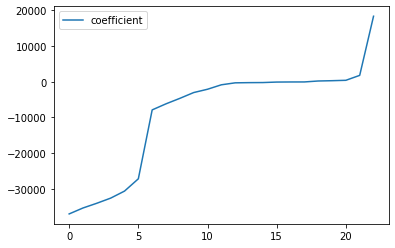

In [ ]:
#Q11 Use Linear regression to evaluate the performance of test and train data of Linear model  using evalmetric
df_lr = LinearRegression()
df_lr.fit(X_train, Y_train)
#Train
predT=df_lr.predict(X_train)
evalmetric(Y_train,predT)
#Test
pred=df_lr.predict(X_test)
evalmetric(Y_test,pred)


lr=pd.DataFrame({'Predictor': X.columns, 'coefficient':df_lr.coef_})
lr.sort_values(by=['coefficient'],ignore_index=True, inplace=True)
lr.plot()

Q12 -Based on the performance of test and training model, can we say there is overfitting or not in the performace of liner model? 

Answer: Yes there is overfitting,  we can observe that model performs great on train data, however, it leads to not great preformance on test data

In [ ]:
#Q13- Use Lasso regression to evaluate the performance of test and train data   using evalmetric
from sklearn.linear_model import Ridge, Lasso,ElasticNet, LassoCV,RidgeCV
model = Lasso()
model.fit(X_train, Y_train) 

predL = model.predict(X_train)          
evalmetric(Y_train,predL)


MSE: 13925780.708163012
RMSE: 3731.72623703334
MAE: 2422.2646035104135
MAPE: 28.45897442940505
R-Squared: 0.8656411510433316


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.140e+10, tolerance: 4.975e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
#Q14 Use Ridge regreesionto evaluate the performance of test and train data   using evalmetric
ridge2=Ridge()
ridge2.fit(X_train, Y_train)

predR = ridge2.predict(X_train)           
evalmetric(Y_train,predR)

MSE: 14162075.174777122
RMSE: 3763.2532700812367
MAE: 2431.8960685485204
MAPE: 28.6004587765938
R-Squared: 0.8633613325387581


Q15- Did you get any improvement on test data using Ridge and Lasso?
Explain why? 

Answer: We can see that with Ridge variance is lower and Lasso which allows the model to perorm better. For this reason we can conclude that with Ridge and Lasso we get better results.

In [ ]:
#Q16-Use Decison Tree Regression to evaluate the performance of test and train data   using evalmetric
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,Y_train)


print('Train Data')
y_pred = dtr.predict(X_train)
evalmetric(Y_train,y_pred)
print('Test Data')
y_pred2 = dtr.predict(X_test)
evalmetric(Y_test,y_pred2)

Train Data
MSE: 98310.4610967261
RMSE: 313.54499054637455
MAE: 85.61362599206353
MAPE: 0.8105510095048039
R-Squared: 0.9990514800807101
Test Data
MSE: 3368926.0273459847
RMSE: 1835.4634366682396
MAE: 825.213829365079
MAPE: 6.7275421861293125
R-Squared: 0.9675368601934466


In [ ]:
#Q17-Use Random Forest to evaluate the performance of test and train data   using evalmetric
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,Y_train)

print('Train Data')
y_pred = rfr.predict(X_train)
evalmetric(Y_train,y_pred)
print('Test Data')
y_pred2 = rfr.predict(X_test)
evalmetric(Y_test,y_pred2)

Train Data
MSE: 473201.0185975736
RMSE: 687.8960812488857
MAE: 324.59790947909755
MAPE: 2.560943588765754
R-Squared: 0.9954344574630114
Test Data
MSE: 2028505.9735800456
RMSE: 1424.2562878850301
MAE: 691.8929177389508
MAPE: 5.540374344333532
R-Squared: 0.9804532149164952


Q18-Why Random forest perform better than Decison Tree on test data?

Answer: Random forest combines multiple decision trees, and for this reason it is more difficult to interpret. Random Forest is suitable for situations when we have a large dataset, and interpretability is not a major concern. The situation with decision trees is different, they are much easier to interpret and understand.

Q19- Which regression technique among Linear Regresssion, Lasso Regression ,Ridge Regression, Decision Tree and Random Forest  provide best performance on test data?

Answer: If we will compare all this techniques linear regression provides best performance
